In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
from ipywidgets import widgets

In [313]:
class Perceptron:
    def __init__(self):
        self.X = None
        self.Y = None
        self.W = None
        self.learning_rate = None
        self.error = []
        
    def fit(self,x,y, algorithm = "delta", learning_rate = 0.001, epochs = 100, mode = 'batch', plot_graph = False):
        self.X = np.column_stack((x,np.ones(x.shape[0], dtype = int)))
        self.W = np.random.normal(size = x.shape[1] + 1)
        self.learning_rate = learning_rate
        self.Y = y
        for _ in range(epochs):
            self.W += self.learn(algorithm)
            #print(self.W)
            self.error_rate()
            if (plot_graph):
                self.plot_boundary()
    
    def learn(self, algorithm):
        if algorithm == "delta":
            activation = phi
            return self.delta_rule(self.W,self.X,self.Y,self.learning_rate)
        elif algorithm == "perceptron":
            activation = sign
            return self.perceptron_rule(self.W,self.X,self.Y,self.learning_rate)
    
    def perceptron_rule(self, W, X, y ,learning_rate):
        return  -learning_rate*(sign(W@X.T) - y)@X
    def delta_rule(self, W, X, y ,learning_rate):
        #return -learning_rate*((phi(W@X.T) - y)*dphi_dx(W@X.T)@X)
        return -learning_rate*((phi(W@X.T) - y)*dphi_dx(W@X.T)@X)

    def predict(self,x):
        x = np.column_stack((x,np.ones(x.shape[0], dtype = int)))
        return activation(x@self.W)   
    def plot_boundary(self):
        n = int(self.X.shape[0])
        plt.scatter(self.X[:,0],self.X[:,1],c = self.Y)
        w1,w2,b = self.W
        x_ = np.linspace(-3,3,5)
        y_ = - (b + w1*x_)/w2
        plt.axis('auto')
        plt.plot(x_, y_, '-r')
        time.sleep(0.01)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.clf()
    def error_rate(self):
        self.error.append((sum((activation(self.W@self.X.T) - self.Y)!=0)/self.X.shape[0]))

    
def sign(x):
    return 0 + (x > 0) - (x <= 0)

def activation(x, function = sign):
    return function(x)

def phi(x):
    return 2/(1 + np.exp(-x)) -1

def dphi_dx(x):
    return (1+phi(x))*(1-phi(x))/2


In [266]:
print("y.shape = {}".format(y.shape))
print("X.shape = {}".format(X.shape))
print("W.shape = {}".format(W.shape))

y.shape = (200,)
X.shape = (200, 3)
W.shape = (3,)


### Generate dataset

In [203]:
def get_data(n, sigmaA, sigmaB, mA, mB):
    
    x1 = np.random.normal(size=(n, 2), loc = mA, scale = sigmaA)
    x2 = np.random.normal(size=(n, 2), loc = mB, scale = sigmaB)
    
    y1 = -np.ones(n)
    y2 = np.ones(n)
    
    #return np.vstack((x1,y1)), np.vstack((x2,y2))
    return randomize(np.vstack((x1, x2)), np.hstack((y1, y2)))

In [204]:
def randomize(a, b):
    # Generate the permutation index array.
    permutation = np.random.permutation(a.shape[0])
    # Shuffle the arrays by giving the permutation in the square brackets.
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    return shuffled_a, shuffled_b

In [262]:
n = 100
mA = [0,0.5]
mB = [0.5,-1]
sigmaA = 0.3
sigmaB = 0.3

In [263]:
x, y = get_data(n, sigmaA, sigmaB, mA, mB)
X = np.column_stack((x,np.ones(x.shape[0], dtype = int)))
W = np.random.normal(size = x.shape[1] + 1)

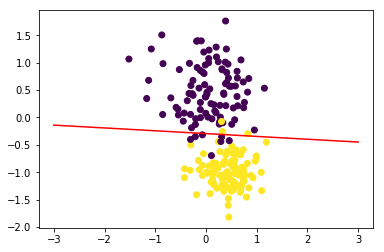

Error: 0.05


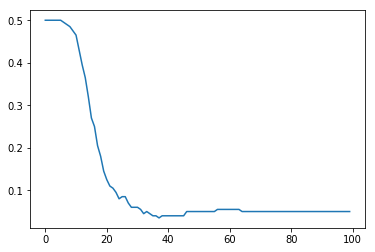

In [315]:
%matplotlib inline
p = Perceptron()
p.fit(x,y, algorithm = "delta", learning_rate = 0.001, epochs = 100, plot_graph = True)
p.plot_boundary()
print("Error: {}".format(p.error[-1]))
plt.clf()
plt.plot(p.error)

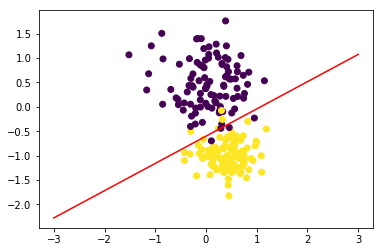

Error: 0.04


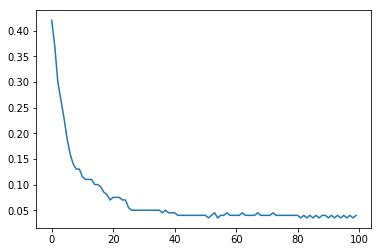

In [316]:
%matplotlib inline
p = Perceptron()
p.fit(x,y, algorithm = "perceptron", learning_rate = 0.001, epochs = 100, plot_graph = True)

p.plot_boundary()
print("Error: {}".format(p.error[-1]))
plt.clf()
plt.plot(p.error)

In [111]:
np.column_stack((b,np.ones(3, dtype = int)))

array([[0, 1, 1],
       [2, 3, 1],
       [4, 5, 1]])

In [111]:
 w1,w2,b = W

In [115]:
W

array([0.15229424, 0.94758742, 1.44384761])

In [84]:
a = np.array([1,2,3])
b =  np.arange(6).reshape(3,2)
print(a)
print(b)

[1 2 3]
[[0 1]
 [2 3]
 [4 5]]


In [87]:
print(a.shape)
print(b.shape)

(3,)
(3, 2)


In [88]:
print(x.shape)
print(W.shape)

(200, 2)
(100,)


In [116]:
x.shape[1]

2

In [169]:
def sign(x):
    return 1 if x >= 0 else -1

def activation(x, function = sign):
    return function(x)

In [179]:
z = np.arange(10)

In [195]:
z_ = 0 + (z > 5 ) - (z <= 5)

In [196]:
z_

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1])